In [2]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

In [3]:
Fs = 22050

In [4]:
x = np.load('values/x.npy')
x_h = np.load('values/x_h.npy')
x_p = np.load('values/x_p.npy')
x_h_onset = np.load('values/x_h_onset.npy')
x_p_onset = np.load('values/x_p_onset.npy')
x_loudness = np.load('values/x_loudness.npy')

In [5]:
sr = Fs

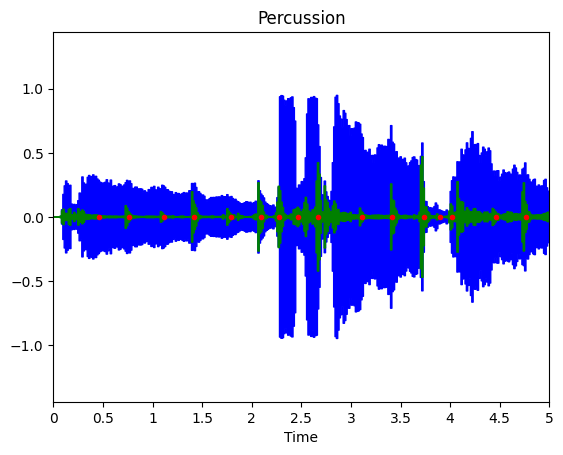

In [14]:
librosa.display.waveshow(x, sr=sr, color='blue', axis='time')
librosa.display.waveshow(x_p, sr=sr, color='green', axis='time')
plt.scatter(x_p_onset[:, 0], np.zeros_like(x_p_onset[:, 0]), color='red', marker='.', label='Note Onsets')
plt.xlim(0, 5)
plt.title('Percussion')
plt.show()

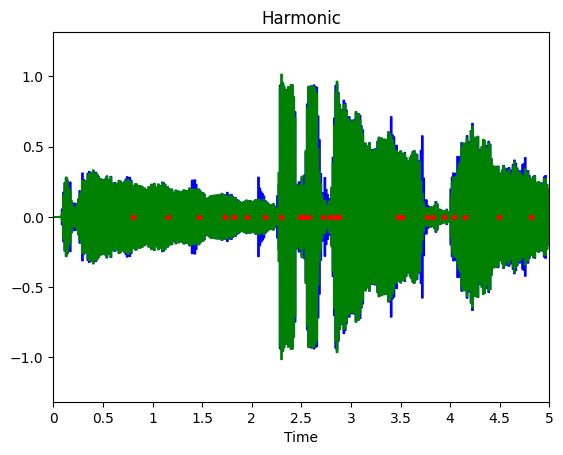

In [7]:
librosa.display.waveshow(x, sr=sr, color='blue', axis='time')
librosa.display.waveshow(x_h, sr=sr, color='green', axis='time')
plt.scatter(x_h_onset[:, 0], np.zeros_like(x_h_onset[:, 0]), color='red', marker='.', label='Note Onsets')
plt.xlim(0, 5)
plt.title('Harmonic')
plt.show()

In [67]:
fps = 30
n_frames = int(librosa.samples_to_time(len(x), sr=sr)*fps)

In [74]:
beats_h = np.rint(x_h_onset[:,0]*fps).astype(int).tolist()
beats_p = np.rint(x_p_onset[:,0]*fps).astype(int).tolist()

In [125]:
# +2 for the last two frames
frames = np.zeros((n_frames+2, 8, 8, 3))
rgb = np.array([1, 0, 0])

for i in range(n_frames):
    frame0 = frames[i]
    frame1 = frames[i+1]
    frame2 = frames[i+2]

    if i in beats_p:
        # do a ripple from the outside
        frame0[0,:] += 1*rgb
        frame0[7,:] += 1*rgb
        frame0[1:7,0] += 1*rgb
        frame0[1:7,7] += 1*rgb
        
        frame1[:2,:] += 0.5*rgb
        frame1[6:,:] += 0.5*rgb
        frame1[2:6,:2] += 0.5*rgb
        frame1[2:6,6:] += 0.5*rgb
        
        frame2[:3,:] += 0.25*rgb
        frame2[5:,:] += 0.25*rgb
        frame2[3:5,:3] += 0.25*rgb
        frame2[3:5,5:] += 0.25*rgb
        
    if i in beats_h:
        # do a ripple from inside
        frame0[3:5, 3:5] += 1*rgb

        frame1[3:5, 3:5] += 0.5*rgb
        frame1[3:5, 2] += 0.5*rgb
        frame1[3:5, 5] += 0.5*rgb
        frame1[5, 3:5] += 0.5*rgb
        frame1[2, 3:5] += 0.5*rgb

        frame2[2:6, 2:6] += 0.25*rgb
        frame2[3:5, 1] += 0.25*rgb
        frame2[3:5, 6] += 0.25*rgb
        frame2[1, 3:5] += 0.25*rgb
        frame2[6, 3:5] += 0.25*rgb
    
    frame0 = np.clip(frame0, 0, 1)
    frame1 = np.clip(frame1, 0, 1)
    frame2 = np.clip(frame2, 0, 1)
    
    frames[i] = frame0
    frames[i+1] = frame1
    frames[i+2] = frame2